# Hypothesis 1:

$H_{0}$: The network latency has gone down or stayed the same since switching providers

$H_{a}$: The network latency has increased since sqitching providers
- True Pos.: Latency has NOT gone down or stayed the same, went with alternate hypthesis
- True Neg.: Latency has NOT gone up, went with null
- Error T1: Latency has gone down or stayed the same, went with alternate
- Error T2: Latency has gone up, went with null

# Hypothesis 2:

$H_{0}$: The website redesign is the same quality or worse than it was before.

$H_{a}$: The website redesign is good
- True Pos.: The website redesign is NOT the same quality or worse than it was before, went with alternate hypthesis
- True Neg.: The website redesign is NOT good, went with null
- Error T1: The website redisgn IS the same quality or worse than it was before, went with alternate
- Error T2: The website redesign IS good, went with null

# Hypothesis 3:

$H_{0}$: The televison ad is not affecting or is lowering sales.

$H_{a}$: The television ad is increasing sales.
- True Pos.: The televison ad IS affecting or is NOT lowering sales, went with alternate hypthesis
- True Neg.: The television ad is NOT increasing sales, went with null
- Error T1: The televison ad is NOT affecting or IS lowering sales, went with alternate
- Error T2: The television ad IS increasing sales, went with null

## Question 1
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
alpha = .05

In [3]:
u1 = 90
s1 = 15
n1 = 40

u2 = 100
s2 = 20
n2 = 50
t, p =stats.ttest_ind_from_stats(u1, s1, n1, u2, s2, n2, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [4]:
if p < alpha:
    print('H_0 is not rejected')

H_0 is not rejected


$H_{0}$ accepted

## Question 2
### Load the `mpg` dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [5]:
mpg = data('mpg')
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis = 1)

In [6]:
fe08 = mpg[mpg.year == 2008].hwy + mpg[mpg.year == 2008].cty
fe99 = mpg[mpg.year == 1999].hwy + mpg[mpg.year == 1999].cty

varience = fe99.var(), fe08.var()
varience

(108.49042145593873, 96.38992042440319)

In [7]:
t, p = stats.ttest_ind(fe08, fe99, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [8]:
p < alpha

False

#### Analysis
We fail to reject $H_{0}$ as the p is greater than alpha.

### Are compact cars more fuel-efficient than the average car?

In [9]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

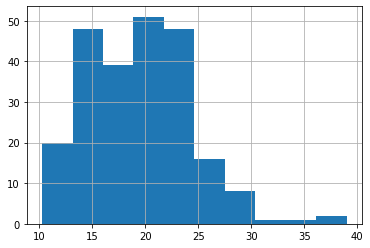

In [11]:
mpg.avg_fe.hist()

<AxesSubplot:>

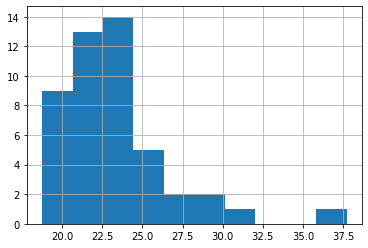

In [12]:
fe_compact.hist()

In [13]:
mpg.avg_fe.var()

24.106173930122633

In [14]:
fe_compact.var()

12.763933193960233

In [19]:
t, p = stats.ttest_1samp(fe_compact, μ)
#t, p = stats.mannwhitneyu(fe_compact, mpg.avg_fe)
t, p/2

(7.512360093161354, 7.808833174403864e-10)

In [ ]:
p/2 < alpha

#### Analysis
We reject $H_{0}$ as the p is less than alpha.

Additionally, as this is a single-tailed question, the t being greater than 0 indicates that $H_{a}$ is also correct.

### Do manual cars get better gas mileage than automatic cars?

In [ ]:
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe
fe_automatic = mpg[mpg.trans.str.contains('auto')].avg_fe

In [ ]:
variance = fe_manual.var(), fe_automatic.var()
variance

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_automatic, equal_var = False)
t, p/2

In [ ]:
p < alpha

#### Analysis
We fail to reject $H_{0}$ as the p is less than alpha.

Additionally, as this is a single-tailed question, the t being greater than 0 indicates that $H_{a}$ is also correct.